<a href="https://colab.research.google.com/github/gdimask/data_science/blob/main/Project_2_Heart_Failure_%5BLog_Regression%5D%5BScikit%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project I learned:
- logistic regression
- intrepeting histogram
- I can use correlation matrix for a binary label
- how to create stacked bar chart

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
main_df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
main_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


EDA

In [ ]:
main_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


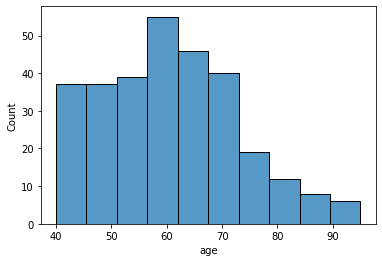

In [ ]:
#@title Distribution of Age

sns.histplot(data=main_df, x='age')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


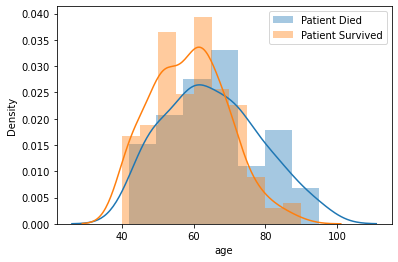

In [ ]:
patient_died = main_df[main_df['DEATH_EVENT'] == 1]
patient_survived = main_df[main_df['DEATH_EVENT'] == 0]

sns.distplot(a=patient_died['age'], label='Patient Died')
sns.distplot(a=patient_survived['age'], label='Patient Survived')
plt.legend()

Conclusion: Based on the distribution, if patient is less than 65 years old, you are more likely to survive, but not by much.

Does gender contributes to DEATH_EVENT?

   sex  DEATH_EVENT  count
0    0            0     71
1    0            1     34
2    1            0    132
3    1            1     62
   sex  DEATH_EVENT  count
0    0            0     71
2    1            0    132


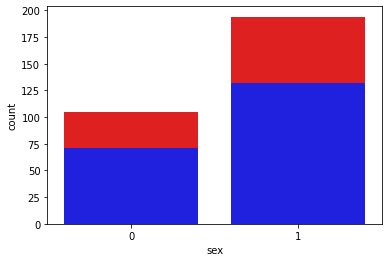

In [ ]:
sex = main_df.groupby('sex').size().reset_index(name='count')
sex_with_death = main_df.groupby(['sex', 'DEATH_EVENT']).size().reset_index(name='count')
print(sex_with_death.head())
survivors = sex_with_death[sex_with_death['DEATH_EVENT'] == 0]
print(survivors.head())

sns.barplot(x=sex['sex'], y=sex['count'], color='red')
sns.barplot(x=survivors['sex'], y=survivors['count'], color='blue')

What's the distribution of male?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


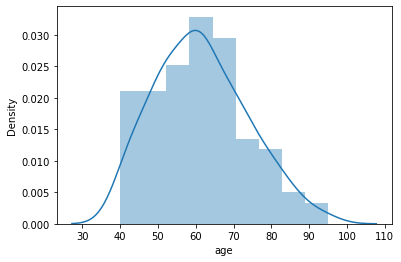

In [ ]:
male_patients = main_df[main_df['sex'] == 1]

sns.distplot(a=male_patients['age'])

What's the age distribution of male that died vs survived?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


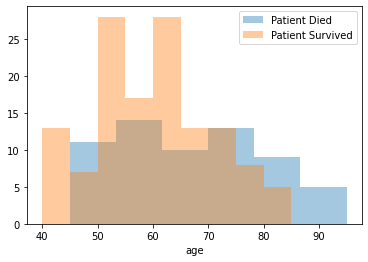

In [ ]:
male_patients_died = main_df[(main_df['sex'] == 1) & (main_df['DEATH_EVENT'] == 1)]
male_patients_survived = main_df[(main_df['sex'] == 1) & (main_df['DEATH_EVENT'] == 0)]
sns.distplot(a=male_patients_died['age'], label='Patient Died', kde=False)
sns.distplot(a=male_patients_survived['age'], label='Patient Survived', kde=False)
plt.legend()

Let's explore platelets

According to google:
Platelets are tiny blood cells that help your body form clots to stop bleeding. If one of your blood vessels gets damaged, it sends out signals to the platelets. The platelets then rush to the site of damage. they form a plug (clot) to fix the damage.

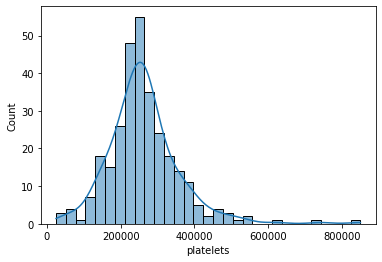

In [ ]:
#@title distribution of platelets

sns.histplot(data=main_df, x='platelets', kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


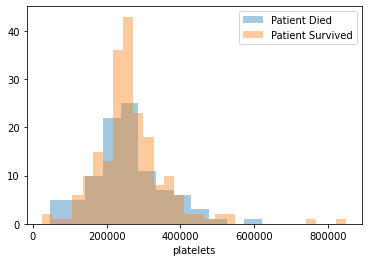

In [ ]:
#@title distribution of platelets survivor vs died
sns.distplot(a=patient_died['platelets'], label='Patient Died', kde=False)
sns.distplot(a=patient_survived['platelets'], label='Patient Survived', kde=False)
plt.legend()


High Blood Pressure

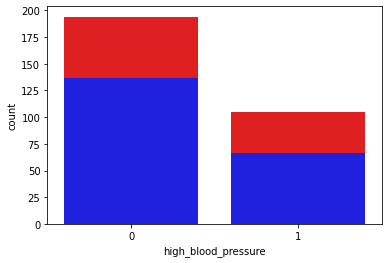

In [ ]:
high_blood_pressure = main_df.groupby('high_blood_pressure').size().reset_index(name='count')
high_blood_pressure_with_death = main_df.groupby(['high_blood_pressure', 'DEATH_EVENT']).size().reset_index(name='count')
survivors = high_blood_pressure_with_death[high_blood_pressure_with_death['DEATH_EVENT'] == 0]

sns.barplot(x=high_blood_pressure['high_blood_pressure'], y=high_blood_pressure['count'], color='red')
sns.barplot(x=survivors['high_blood_pressure'], y=survivors['count'], color='blue')

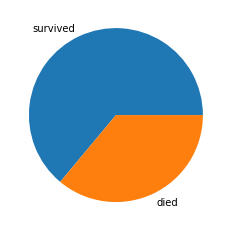

In [ ]:
#@title High blood pressure and male

# high_blood_pressure = main_df[main_df['high_blood_pressure'] == 1]
# hbp_and_male = high_blood_pressure[main_df['sex'] == 1]
# hbp_and_male.plot.pie(x='DEATH_EVENT', figsize=(5, 5))
hbp_and_sex = main_df.groupby(['high_blood_pressure', 'sex', 'DEATH_EVENT']).size().reset_index(name='count')
hbp_and_male = hbp_and_sex[(hbp_and_sex['sex'] == 1) & (hbp_and_sex['high_blood_pressure'] == 1)]
# print(hbp_and_male)
total = sum(hbp_and_male['count'])
percentages = hbp_and_male['count'] / total * 100


fig, ax = plt.subplots()
labels = ['survived', 'died']
ax.pie(percentages, labels=labels)
plt.show()

Predict using Heatmap Correlation

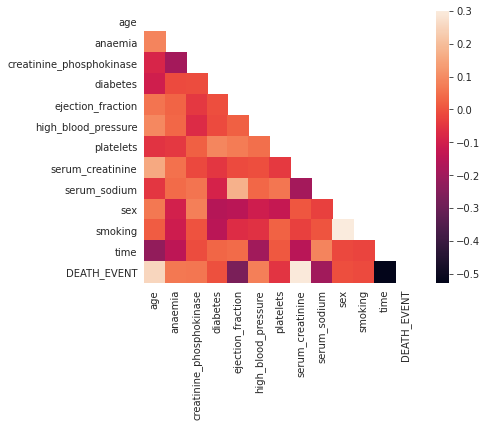

In [ ]:
corr = main_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [ ]:
features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
label = ["DEATH_EVENT"]

feature_df = main_df[features]
label_df = main_df[label]

feature_df.head()

,age,ejection_fraction,serum_creatinine,serum_sodium
0,75.0,20,1.9,130
1,55.0,38,1.1,136
2,65.0,20,1.3,129
3,50.0,20,1.9,137
4,65.0,20,2.7,116


In [ ]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()
logisticRegression.fit(features_train, labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicitions = logisticRegression.predict(features_test)
score = logisticRegression.score(features_test, labels_test)
print(score)

0.8


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(labels_test, predicitions)

array([[39,  4],
       [ 8,  9]])

In [ ]:
from sklearn.metrics import precision_score
precision_score(labels_test, predicitions)

0.6923076923076923

In [ ]:
from sklearn.metrics import recall_score
recall_score(labels_test, predicitions)

0.5294117647058824

I think it's better to lower the classification threshold, so that our recall score can increase.

The reason why the recall score should be increased is to prevent uncalled death potential. It's better to lower the false negatives.